<a href="https://colab.research.google.com/github/mertbkts/corner2image/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating "B" type of data (The type of image that will be generated)

In [ ]:
import os
import cv2

# Clear output file
!rm -r /content/drive/MyDrive/CI_Project/Dataset/frames

# Main folder containing sub-folders with videos
main_folder = '/content/drive/MyDrive/CI_Project/Dataset/mp4s/trailer'

# The folder where extracted frames will be saved to
output_folder = '/content/drive/MyDrive/CI_Project/Dataset/frames'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Initialize a counter for numbering the image files
file_counter = 1

# The frame interval to save an image
frame_interval = 20

# Iterate over the sub-folders in the main folder
for folder_name in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder_name)
    
    # Iterate over the files in each sub-folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.mp4'):
            video_path = os.path.join(folder_path, filename)
            
            # Open the video file
            video = cv2.VideoCapture(video_path)
            
            # # Create a sub-folder in the output folder
            # subfolder_name = os.path.splitext(filename)[0]
            # subfolder_path = os.path.join(output_folder, subfolder_name)
            # os.makedirs(subfolder_path, exist_ok=True)
            
            # Read and process each frame of the video
            frame_count = 0
            while True:
                success, frame = video.read()
                if not success:
                    break
                
                # Increment the frame count
                frame_count += 1
                
                # Check if the current frame is the desired interval
                if frame_count % frame_interval == 0:
                    # Convert frame to grayscale
                    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                    
                    # Resize frame to 286x286
                    #resized_frame = cv2.resize(gray_frame, (286, 286))
                    
                    # Save the frame as an image with numerical filename
                    image_path = os.path.join(output_folder, f'{file_counter}.jpg')
                    #cv2.imwrite(image_path, resized_frame)
                    cv2.imwrite(image_path, gray_frame)
                    
                    print(f'Saved image: {file_counter}')
                    file_counter += 1
                    
            
            # Release the video object
            video.release()

In [ ]:
import os
import random
import shutil

# Folder for 'B' type of dataset
main_folder = '/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/B'

# The folder containing the images
images_folder = '/content/drive/MyDrive/CI_Project/Dataset/frames'

# Ratio for train, test, and validation sets
train_ratio = 70
test_ratio = 20
val_ratio = 10

# Create train, test, and validation folders
train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'test')
val_folder = os.path.join(main_folder, 'val')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Get the list of image files in the images folder
image_files = os.listdir(images_folder)

# Shuffle the image files randomly
random.shuffle(image_files)

# Calculate the number of images for each set
total_images = len(image_files)
train_count = int(total_images * train_ratio / 100)
test_count = int(total_images * test_ratio / 100)
val_count = total_images - train_count - test_count

# Iterate over the image files and move them to the corresponding set folders
for i, image_file in enumerate(image_files):
    source_path = os.path.join(images_folder, image_file)
    
    if i < train_count:
        destination_path = os.path.join(train_folder, image_file)
    elif i < train_count + test_count:
        destination_path = os.path.join(test_folder, image_file)
    else:
        destination_path = os.path.join(val_folder, image_file)
    
    # Copy the image file to the corresponding set folder
    shutil.copy(source_path, destination_path)


# Creating 'A' type of data (The one that will be generated from, images with only corners)

## Using Canny corner detection

In [59]:
from google.colab.patches import cv2_imshow

In [104]:
def apply_canny_edge_detection(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate over the files in the input folder
    for filename in os.listdir(input_folder):
        file_path = os.path.join(input_folder, filename)

        # Skip if the item is not a file or not an image
        if not os.path.isfile(file_path) or not any(file_path.lower().endswith(ext) for ext in ['.png', '.jpg', '.jpeg']):
            continue

        # Read the image
        image = cv2.imread(file_path)

        # Apply Canny edge detection
        edges = cv2.Canny(image, 10, 50)

        # Save the result to the output folder with the same file name
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, edges)

In [106]:
# Applying to validation folder
val_b_folder = '/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/B/val'
val_a_folder = '/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/A/val'

apply_canny_edge_detection(val_b_folder, val_a_folder)

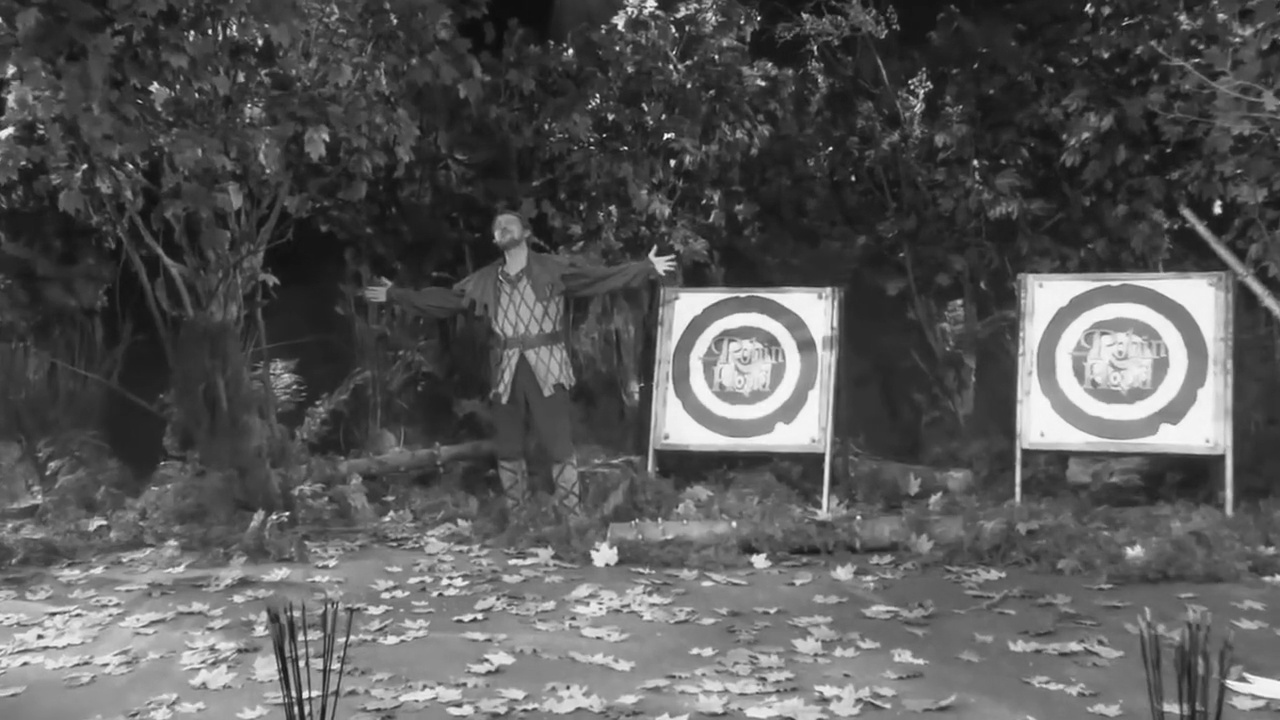

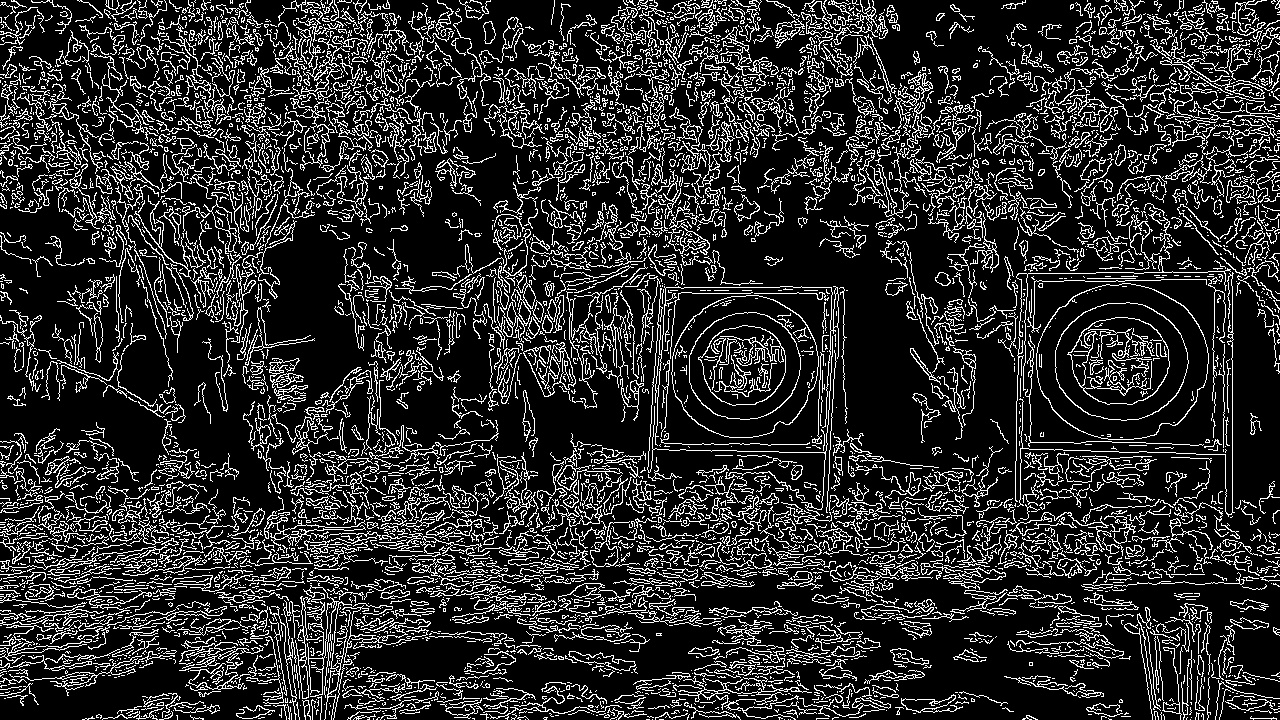

In [107]:
# Checking the images
cv2_imshow(cv2.imread('/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/B/val/1.jpg'))
cv2_imshow(cv2.imread('/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/A/val/1.jpg'))

In [108]:
# Applying to test folder
test_b_folder = '/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/B/test'
test_a_folder = '/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/A/test'

apply_canny_edge_detection(test_b_folder, test_a_folder)

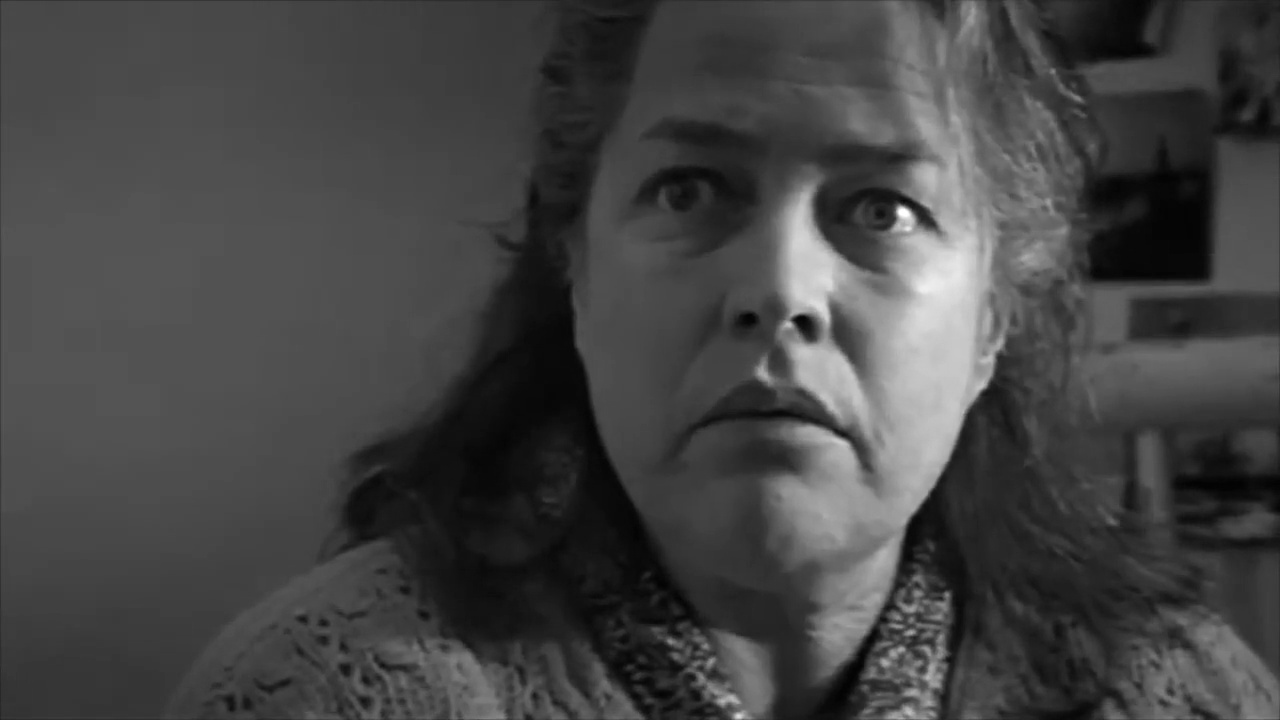

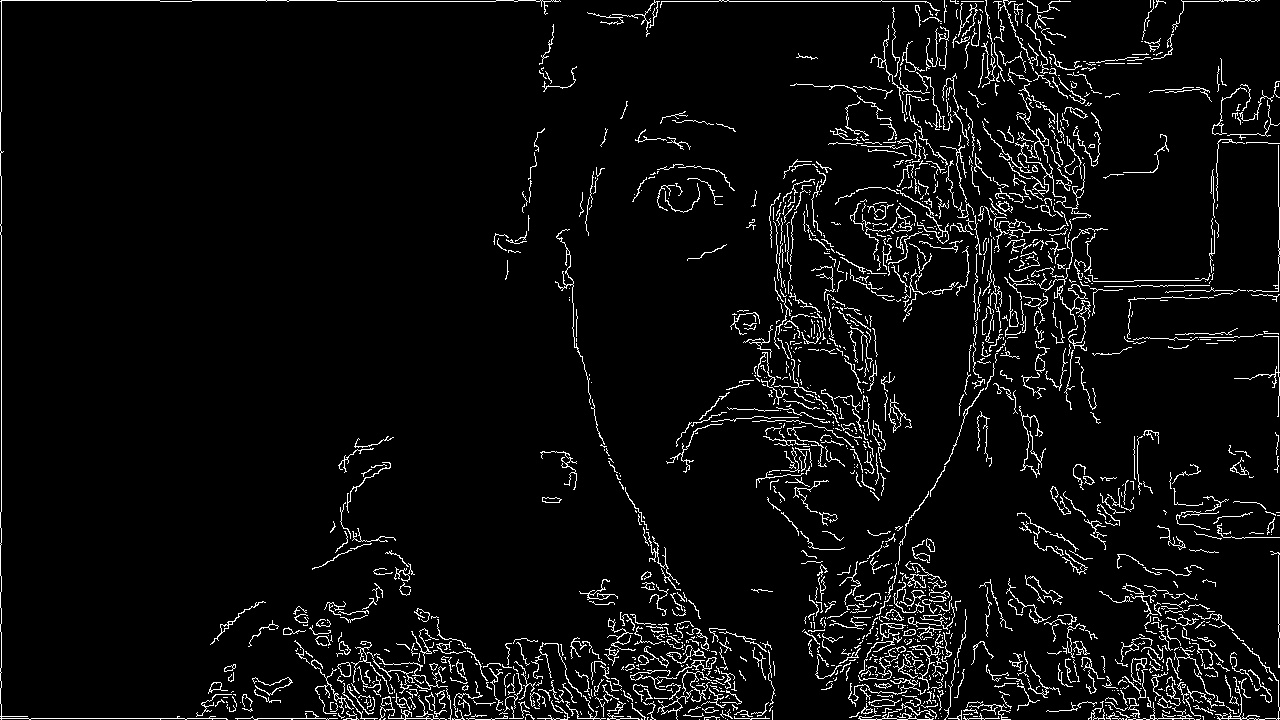

In [109]:
# Checking the images
cv2_imshow(cv2.imread('/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/B/test/1004.jpg'))
cv2_imshow(cv2.imread('/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/A/test/1004.jpg'))

In [110]:
# Applying to train folder
train_b_folder = '/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/B/train'
train_a_folder = '/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/A/train'

apply_canny_edge_detection(train_b_folder, train_a_folder)

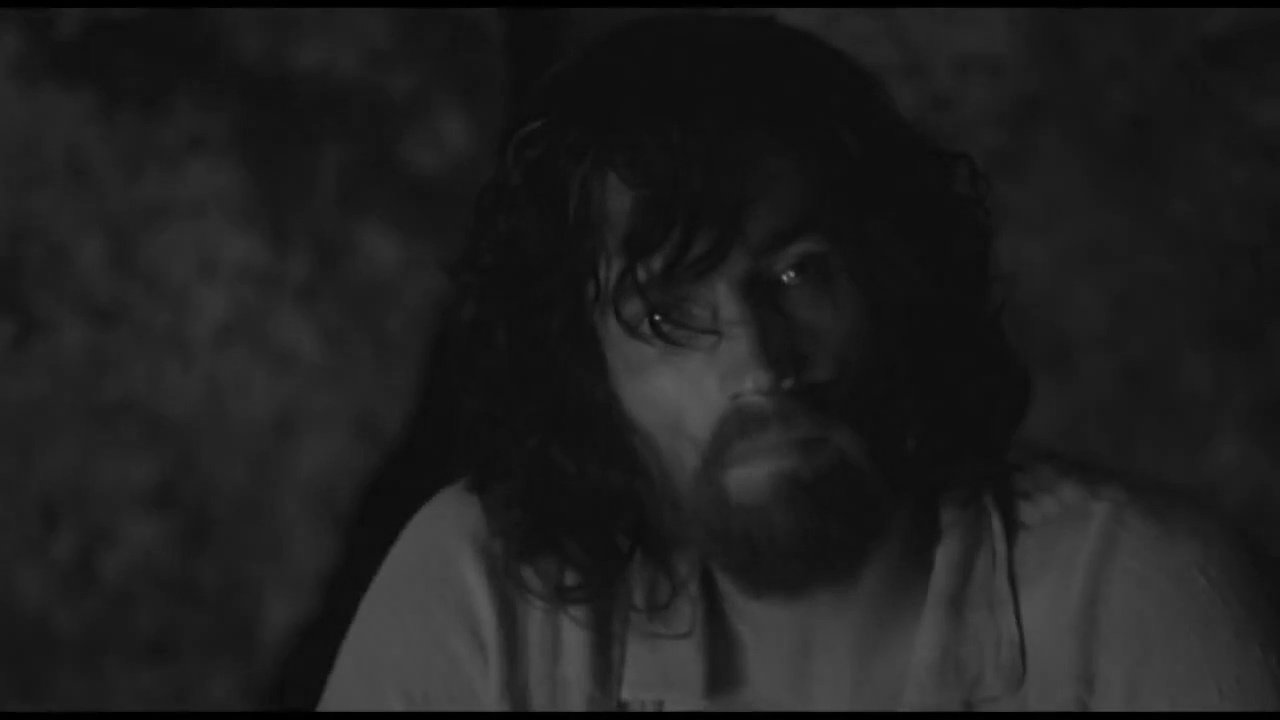

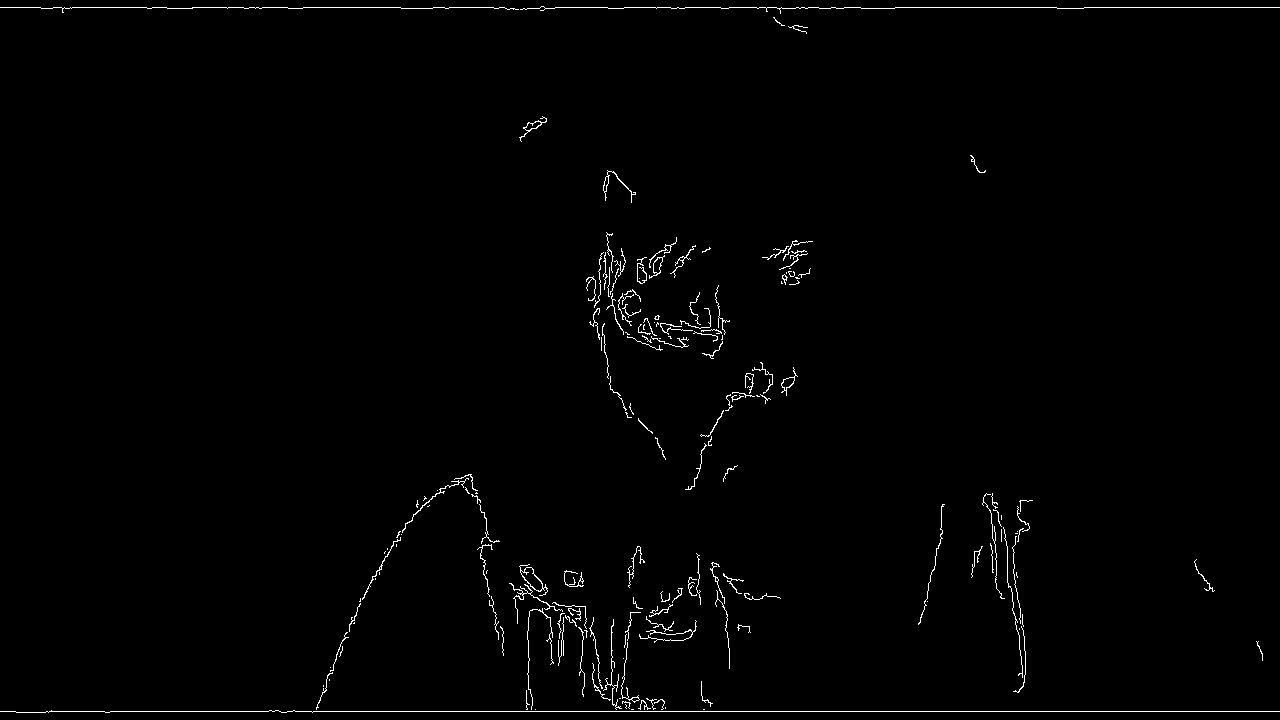

In [111]:
# Checking the images
cv2_imshow(cv2.imread('/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/B/train/10.jpg'))
cv2_imshow(cv2.imread('/content/drive/MyDrive/CI_Project/Dataset/ready_dataset/A/train/10.jpg'))